# Let's begin the process with some EDA



We shall begin with linear regression and move ahead with different algorithms to get a better r2 value

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dfr=pd.read_csv('/content/MiningProcess_Flotation_Plant_Database.csv')
dfr

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38706,2017-04-01 06:00:00,"59,72","9,22","2082,03","572,831","396,658","9,68111","1,78087","175,9183261771","187,4491577783",...,"250,581","803,39","803,498","811,092","431,621","441,345","462,082","451,001","64,03","3,11"
38707,2017-04-01 06:00:00,"59,72","9,22","2087,26","571,17","398,788","9,68088","1,78103","175,917903635","187,4517490784",...,"252,289","794,792","799,575","821,917","419,698","427,143","479,488","452,428","64,03","3,11"
38708,2017-04-01 06:00:00,"59,72","9,22","2096,76","570,799","398,966","9,68064","1,78119","175,917481093","187,4543403785",...,"252,423","799,506","802,5","819,131","434,77","433,167","460,601","438,683","64,03","3,11"
38709,2017-04-01 06:00:00,"59,72","9,22","2106,27","570,428","399,144","9,68041","1,78136","175,9170585509","187,4569316785",...,"252,556","804,219","805,426","816,344","449,841","439,191","441,715","424,938","64,03","3,11"


In [5]:
dfr.shape

(38711, 24)

In [6]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38711 entries, 0 to 38710
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          38711 non-null  object
 1   % Iron Feed                   38711 non-null  object
 2   % Silica Feed                 38711 non-null  object
 3   Starch Flow                   38711 non-null  object
 4   Amina Flow                    38711 non-null  object
 5   Ore Pulp Flow                 38711 non-null  object
 6   Ore Pulp pH                   38711 non-null  object
 7   Ore Pulp Density              38711 non-null  object
 8   Flotation Column 01 Air Flow  38711 non-null  object
 9   Flotation Column 02 Air Flow  38711 non-null  object
 10  Flotation Column 03 Air Flow  38711 non-null  object
 11  Flotation Column 04 Air Flow  38711 non-null  object
 12  Flotation Column 05 Air Flow  38711 non-null  object
 13  Flotation Column

*We have 24 columns out of which 2 columsn **% iron conc** and **% silica conc** give the product quality and rest are feed characteristics and process parameters.*

In [7]:
# Getting the column for the dataset
colname=dfr.columns
colname

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [8]:
# Correcting the integer formats
for col in colname:
    dfr[col]=dfr[col].str.replace(',','.')
dfr.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31


In [9]:
colname1=colname[1::]
colname1

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [10]:
# Converting string columns to numeric depending on the column types based on the technical details
for col in colname1:
    dfr[col]=dfr[col].apply(pd.to_numeric) 
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38711 entries, 0 to 38710
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          38711 non-null  object 
 1   % Iron Feed                   38711 non-null  float64
 2   % Silica Feed                 38711 non-null  float64
 3   Starch Flow                   38711 non-null  float64
 4   Amina Flow                    38711 non-null  float64
 5   Ore Pulp Flow                 38711 non-null  float64
 6   Ore Pulp pH                   38711 non-null  float64
 7   Ore Pulp Density              38711 non-null  float64
 8   Flotation Column 01 Air Flow  38711 non-null  float64
 9   Flotation Column 02 Air Flow  38711 non-null  float64
 10  Flotation Column 03 Air Flow  38711 non-null  float64
 11  Flotation Column 04 Air Flow  38711 non-null  float64
 12  Flotation Column 05 Air Flow  38711 non-null  float64
 13  F

In [11]:
dfr['date'].value_counts()

2017-03-14 13:00:00    180
2017-03-15 15:00:00    180
2017-03-15 17:00:00    180
2017-03-15 18:00:00    180
2017-03-15 19:00:00    180
                      ... 
2017-03-13 05:00:00    180
2017-03-13 06:00:00    180
2017-04-01 04:00:00    180
2017-03-10 01:00:00    174
2017-04-01 06:00:00     17
Name: date, Length: 216, dtype: int64

In [12]:
dfr.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,38711.000000,38711.000000,38711.000000,38711.000000,38711.000000,38711.000000,38711.000000,38711.000000,38711.000000,38711.000000,...,38711.000000,38711.000000,38711.000000,38710.000000,38710.000000,38710.000000,38710.000000,38710.000000,38710.000000,38710.000000
mean,58.711453,11.096496,2987.472284,479.236188,400.358372,9.645387,1.706414,232.381253,232.038794,232.902507,...,250.004522,611.194814,597.788817,609.170562,475.746383,485.480528,501.372032,487.390098,65.484364,2.530615
std,1.798671,3.009333,1186.996853,88.300668,5.675833,0.363465,0.078840,27.242624,27.583502,26.222096,...,1.838966,163.801788,173.512122,170.774844,95.599997,77.593565,65.072594,82.915881,1.199846,1.208069
min,54.300000,8.240000,0.013230,241.830000,376.260000,8.753340,1.519830,175.752000,176.401000,176.469000,...,218.188000,150.572000,210.986000,128.789000,162.439000,166.999000,160.806000,175.460000,62.830000,1.000000
25%,58.190000,9.090000,2176.815000,432.922000,397.137000,9.392440,1.690000,200.220000,196.903000,200.939000,...,249.280000,460.950000,453.574000,462.396000,441.469000,444.150000,450.626000,443.336500,64.410000,1.460000
50%,59.090000,10.100000,3212.890000,508.789000,400.103000,9.667950,1.740000,249.335000,248.280000,249.170000,...,250.016000,552.414000,552.221000,551.150000,466.615000,465.714500,481.000500,479.478000,65.760000,2.270000
75%,59.720000,11.460000,3798.145000,546.265000,403.213000,9.910350,1.758880,250.433000,251.147000,250.598000,...,250.664000,801.024500,795.137500,798.990500,544.842750,545.765750,550.635250,548.859500,66.420000,3.420000
max,61.380000,20.140000,6250.000000,703.430000,418.623000,10.798900,1.853100,261.255000,332.446000,286.677000,...,257.739000,862.229000,828.903000,886.822000,680.359000,675.586000,698.530000,659.900000,67.600000,5.500000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1.08e+06x780000 with 0 Axes>

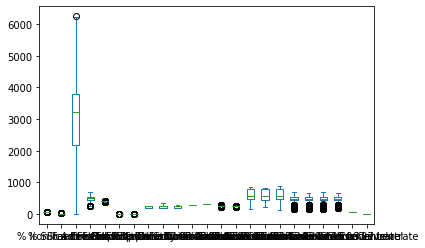

In [13]:
# Outliers are checked for few numeric columns through Boxplots

plt.figure(figsize=(3600,2600),dpi=300)

dfr.plot(kind='box')
plt.show()

Droping date as it's of no use to our analysis

In [14]:
dfr=dfr.drop('date', axis=1)

In [15]:
dfr.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.947986,-0.361133,-0.126123,0.007181,-0.352490,-0.139639,-0.360953,-0.364685,-0.364311,...,0.009086,0.311100,0.277989,0.305545,-0.119505,-0.112896,-0.088277,-0.132965,-0.331447,0.277777
% Silica Feed,-0.947986,1.000000,0.290722,0.164551,-0.025994,0.353796,0.128870,0.254471,0.247361,0.252506,...,0.002182,-0.202039,-0.173858,-0.190818,0.091300,0.098503,0.088451,0.111432,0.299537,-0.222053
Starch Flow,-0.361133,0.290722,1.000000,-0.017894,-0.017657,0.389592,0.268865,0.578784,0.582296,0.584166,...,-0.021180,-0.508250,-0.459653,-0.492747,0.062687,0.157022,0.143655,0.190547,0.165093,-0.061618
Amina Flow,-0.126123,0.164551,-0.017894,1.000000,-0.128894,0.166217,0.615159,-0.159408,-0.134931,-0.147886,...,-0.016086,-0.039698,-0.096960,-0.000833,-0.033591,-0.030521,-0.219249,-0.003438,0.031923,-0.015797
Ore Pulp Flow,0.007181,-0.025994,-0.017657,-0.128894,1.000000,-0.154145,-0.197874,0.018775,0.016849,0.018210,...,0.014112,0.011921,0.090285,-0.029285,0.003388,-0.081860,-0.008908,-0.140103,0.022685,-0.072593
Ore Pulp pH,-0.352490,0.353796,0.389592,0.166217,-0.154145,1.000000,0.487655,0.258453,0.270638,0.264005,...,0.024381,-0.191705,-0.211631,-0.137978,0.230128,0.336695,0.274310,0.339446,0.126096,0.027648
Ore Pulp Density,-0.139639,0.128870,0.268865,0.615159,-0.197874,0.487655,1.000000,0.105923,0.140193,0.123370,...,-0.017208,-0.224801,-0.238399,-0.169717,0.109665,0.168835,-0.001526,0.221432,-0.038002,0.133404
Flotation Column 01 Air Flow,-0.360953,0.254471,0.578784,-0.159408,0.018775,0.258453,0.105923,1.000000,0.982591,0.995455,...,-0.024387,-0.841142,-0.755261,-0.838214,0.067022,0.126955,0.188823,0.195467,0.224879,-0.091324
Flotation Column 02 Air Flow,-0.364685,0.247361,0.582296,-0.134931,0.016849,0.270638,0.140193,0.982591,1.000000,0.987470,...,-0.021892,-0.853519,-0.760869,-0.851134,0.061422,0.118818,0.171791,0.190247,0.208779,-0.088946
Flotation Column 03 Air Flow,-0.364311,0.252506,0.584166,-0.147886,0.018210,0.264005,0.123370,0.995455,0.987470,1.000000,...,-0.022761,-0.850800,-0.761760,-0.848206,0.064970,0.122449,0.181612,0.193150,0.210717,-0.085321


In [16]:
# Creating function for outlier removal.
def remove_outlier(dfr_in, col_name): 
    Q1 = dfr_in[col_name].quantile(0.01) 
    Q3 = dfr_in[col_name].quantile(0.99) 
    IQR=Q3-Q1               # Interquantile range
    dfr_out = dfr_in.loc[(dfr_in[col_name] >= (Q1 - 1.5 * IQR)) & (dfr_in[col_name] <= (Q3 + 1.5 * IQR))]
    return(dfr_out)

# Removing outliers in numeric columns
for i in colname1:
    dfr= remove_outlier(dfr,i)

In [17]:
dfr.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,38643.000000,38643.000000,38643.000000,38643.00000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,...,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000,38643.000000
mean,58.712331,11.096989,2986.428825,479.12050,400.362188,9.646009,1.706348,232.351309,232.007684,232.873928,...,250.055337,611.472825,598.037813,609.444736,475.891571,485.548851,501.458686,487.454077,65.484579,2.529281
std,1.800114,3.011946,1187.752223,88.33482,5.678476,0.363473,0.078893,27.254495,27.595530,26.234318,...,1.371186,163.800968,173.552927,170.794154,95.538165,77.642348,65.092708,82.940877,1.200874,1.208691
min,54.300000,8.240000,0.013230,241.83000,376.260000,8.753340,1.519830,175.752000,176.401000,176.469000,...,238.184000,150.572000,210.986000,128.789000,162.439000,166.999000,160.806000,175.460000,62.830000,1.000000
25%,58.190000,9.090000,2175.996000,432.83100,397.145500,9.394210,1.690000,200.215000,196.886500,200.922500,...,249.291000,461.112500,453.604500,462.607500,441.511000,444.175000,450.647000,443.401500,64.410000,1.460000
50%,59.090000,10.100000,3209.770000,508.51400,400.107000,9.668540,1.740000,249.324000,248.269000,249.170000,...,250.017000,552.489000,552.250000,551.312000,466.697000,465.850000,481.221000,479.480000,65.760000,2.270000
75%,59.720000,11.460000,3798.880000,546.26500,403.225500,9.910800,1.758950,250.433000,251.147000,250.598000,...,250.664000,801.067000,795.179000,799.067500,544.884000,545.822000,550.680500,548.941000,66.420000,3.420000
max,61.380000,20.140000,6250.000000,703.43000,418.623000,10.798900,1.853100,261.255000,332.446000,286.677000,...,257.739000,862.229000,828.903000,886.822000,680.359000,675.586000,698.530000,659.900000,67.600000,5.500000


In [18]:
colname2=colname1[:-1]
colname2

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


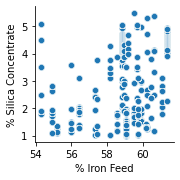

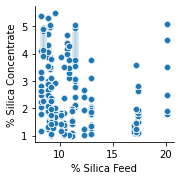

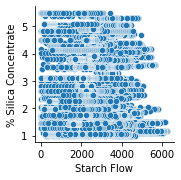

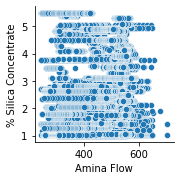

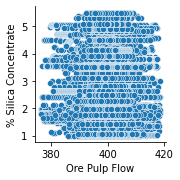

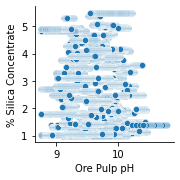

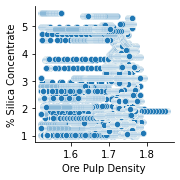

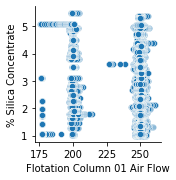

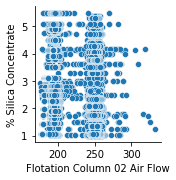

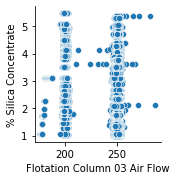

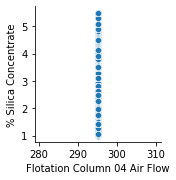

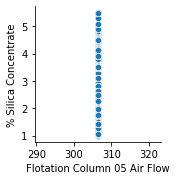

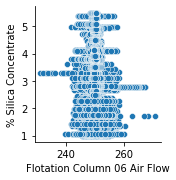

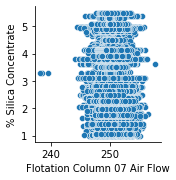

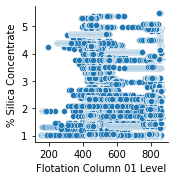

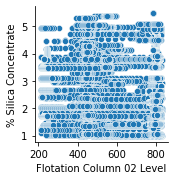

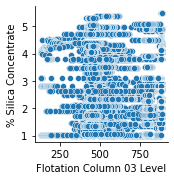

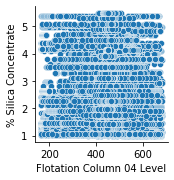

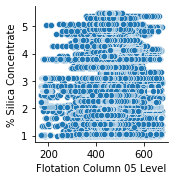

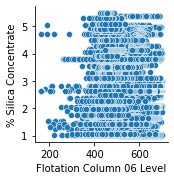

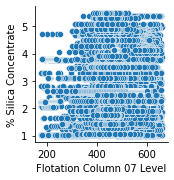

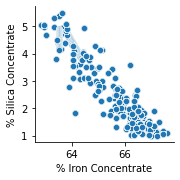

In [19]:
# Checking the correlation between dependent and independent variables
for col in colname2:
    sns.pairplot(data=dfr,x_vars=col,y_vars=['% Silica Concentrate'])

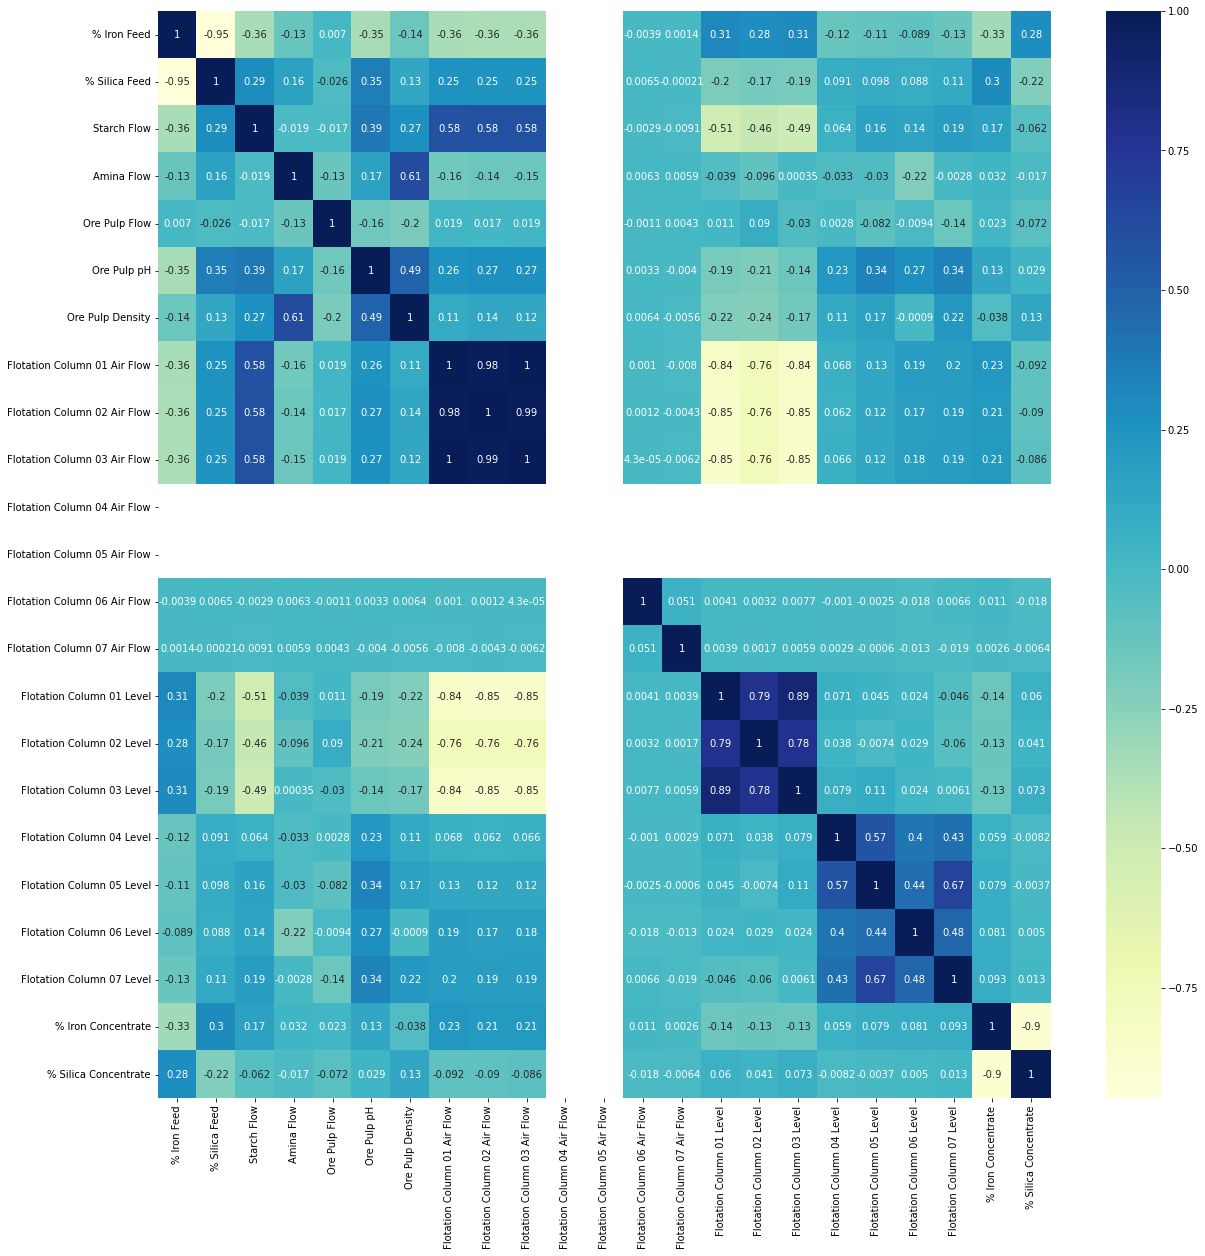

In [20]:
plt.figure(figsize=(20, 20))

sns.heatmap(dfr[colname1].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [21]:
# Dividing into X and Y sets for model building
# Putting target variable to y
y = dfr['% Silica Concentrate']

# Putting feature variables to X
X = dfr.drop(['% Silica Concentrate','% Iron Concentrate'], axis=1)

# Scaling and importing necessary libraries to build the model

In [22]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [23]:
# instantiating an Standard Scaler object
scaler = StandardScaler()

# Scaling the numeric variables of train dataset
X_train[X_train.columns]= scaler.fit_transform(X_train[X_train.columns])

In [24]:
# Scaling the numeric variables of test dataset
X_test[X_test.columns]= scaler.transform(X_test[X_test.columns])

# Linear Regression without PCA

In [25]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output no variable of 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('% Iron Feed', True, 1),
 ('% Silica Feed', True, 1),
 ('Starch Flow', False, 5),
 ('Amina Flow', True, 1),
 ('Ore Pulp Flow', True, 1),
 ('Ore Pulp pH', False, 2),
 ('Ore Pulp Density', True, 1),
 ('Flotation Column 01 Air Flow', True, 1),
 ('Flotation Column 02 Air Flow', True, 1),
 ('Flotation Column 03 Air Flow', True, 1),
 ('Flotation Column 04 Air Flow', False, 11),
 ('Flotation Column 05 Air Flow', False, 12),
 ('Flotation Column 06 Air Flow', False, 7),
 ('Flotation Column 07 Air Flow', False, 9),
 ('Flotation Column 01 Level', True, 1),
 ('Flotation Column 02 Level', True, 1),
 ('Flotation Column 03 Level', False, 10),
 ('Flotation Column 04 Level', False, 3),
 ('Flotation Column 05 Level', False, 4),
 ('Flotation Column 06 Level', False, 8),
 ('Flotation Column 07 Level', False, 6)]

In [26]:
col = X_train.columns[rfe.support_]
col

Index(['% Iron Feed', '% Silica Feed', 'Amina Flow', 'Ore Pulp Flow',
       'Ore Pulp Density', 'Flotation Column 01 Air Flow',
       'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
       'Flotation Column 01 Level', 'Flotation Column 02 Level'],
      dtype='object')

In [27]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             OLS Regression Results                             
Dep. Variable:     % Silica Concentrate   R-squared:                       0.157
Model:                              OLS   Adj. R-squared:                  0.157
Method:                   Least Squares   F-statistic:                     504.5
Date:                  Sat, 23 Jul 2022   Prob (F-statistic):               0.00
Time:                          08:04:48   Log-Likelihood:                -41108.
No. Observations:                 27050   AIC:                         8.224e+04
Df Residuals:                     27039   BIC:                         8.233e+04
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
# checking VIF for the above model:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Flotation Column 03 Air Flow,157.27
5,Flotation Column 01 Air Flow,117.26
6,Flotation Column 02 Air Flow,40.72
0,% Iron Feed,12.79
1,% Silica Feed,12.07
8,Flotation Column 01 Level,4.66
9,Flotation Column 02 Level,3.11
2,Amina Flow,2.04
4,Ore Pulp Density,1.85
3,Ore Pulp Flow,1.07


In [29]:
X_train_new = X_train_rfe.drop(["Flotation Column 03 Air Flow"], axis = 1)
X_train_new.columns

Index(['% Iron Feed', '% Silica Feed', 'Amina Flow', 'Ore Pulp Flow',
       'Ore Pulp Density', 'Flotation Column 01 Air Flow',
       'Flotation Column 02 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level'],
      dtype='object')

In [30]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                             OLS Regression Results                             
Dep. Variable:     % Silica Concentrate   R-squared:                       0.152
Model:                              OLS   Adj. R-squared:                  0.152
Method:                   Least Squares   F-statistic:                     539.7
Date:                  Sat, 23 Jul 2022   Prob (F-statistic):               0.00
Time:                          08:06:41   Log-Likelihood:                -41187.
No. Observations:                 27050   AIC:                         8.239e+04
Df Residuals:                     27040   BIC:                         8.248e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
# checking VIF for the above model:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Flotation Column 02 Air Flow,32.24
5,Flotation Column 01 Air Flow,30.53
0,% Iron Feed,12.66
1,% Silica Feed,11.96
7,Flotation Column 01 Level,4.61
8,Flotation Column 02 Level,3.11
2,Amina Flow,2.04
4,Ore Pulp Density,1.84
3,Ore Pulp Flow,1.07


In [32]:
## Residual Analysis of the train data
y_train_pred= lm.predict(X_train_lm)
res=y_train - y_train_pred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

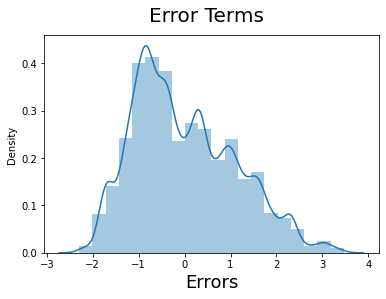

In [33]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

*We observe that the error terms are normally distributed and mean is zero. So we can conclude that fundamental assumtions of linear regression is complied here.*

In [34]:
#Predicting for test values

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
y_test_pred = lm.predict(X_test_new)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.14024855404062142

Train data score

In [37]:
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.1522748701723592


Test data score

In [38]:
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.14024855404062142


# **Linear Regression after Principal component analysis**

In [39]:
# Instantiating PCA
pca = PCA(svd_solver='randomized', random_state=42)

# Performing PCA
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [40]:
# Checking the principal components
pca.components_

array([[ 2.10003102e-01, -1.67217629e-01, -2.75293078e-01,
        -1.65628718e-03,  1.54752475e-02, -1.69665086e-01,
        -1.17837346e-01, -3.79234329e-01, -3.81053047e-01,
        -3.81617612e-01, -0.00000000e+00, -0.00000000e+00,
         3.46734686e-03,  3.36788580e-03,  3.52052444e-01,
         3.27054453e-01,  3.46256958e-01, -4.55066789e-02,
        -7.09380714e-02, -7.58344221e-02, -1.04440217e-01],
       [ 1.44580588e-01, -1.65495114e-01, -5.78171349e-02,
        -7.92243903e-02,  1.09271374e-01, -3.19077920e-01,
        -1.93855873e-01,  7.89439781e-02,  8.15131265e-02,
         8.08289320e-02, -8.47032947e-22,  1.05879118e-22,
         1.60466116e-04,  3.47331611e-03, -1.78894589e-01,
        -1.41999533e-01, -2.11936946e-01, -3.95665720e-01,
        -4.61988405e-01, -3.45908507e-01, -4.29667014e-01],
       [ 2.75975740e-01, -3.12439565e-01, -3.85081946e-02,
        -5.55789865e-01,  1.66330007e-01, -2.05029942e-01,
        -4.36595552e-01,  1.53293368e-01,  1.32639624e

In [41]:
# Checking the variance explained by principal components
pca.explained_variance_ratio_

array([3.25814835e-01, 1.49535837e-01, 1.05791588e-01, 8.10361326e-02,
       5.53220805e-02, 5.01328970e-02, 4.90998295e-02, 3.97102245e-02,
       3.00645309e-02, 2.84677287e-02, 2.41895195e-02, 1.63957330e-02,
       1.40598113e-02, 1.21975269e-02, 9.23845024e-03, 5.57414070e-03,
       2.23365929e-03, 9.33937984e-04, 2.01537632e-04, 3.36505860e-66,
       4.27014115e-67])

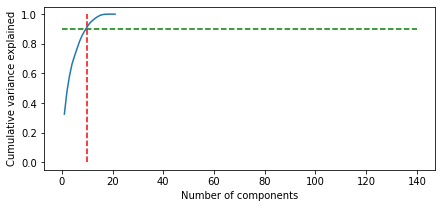

In [42]:
#Scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[7,3])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=140, xmin=0, colors="g", linestyles="--")
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of components")
plt.show()

In [43]:
#### Applying the PCA on the train set

# Performing PCA with 28 components
pca_final = IncrementalPCA(n_components=10)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape


(27050, 10)

In [44]:
# Applying the PCA transformation on the test set
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(11593, 10)

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_pca= sm.add_constant(X_train_pca)
lm = sm.OLS(y_train,X_train_pca).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                             OLS Regression Results                             
Dep. Variable:     % Silica Concentrate   R-squared:                       0.098
Model:                              OLS   Adj. R-squared:                  0.098
Method:                   Least Squares   F-statistic:                     294.0
Date:                  Sat, 23 Jul 2022   Prob (F-statistic):               0.00
Time:                          08:35:11   Log-Likelihood:                -42025.
No. Observations:                 27050   AIC:                         8.407e+04
Df Residuals:                     27039   BIC:                         8.416e+04
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5277      0.007

# Random Forest Model

In [58]:
# Random forest
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestRegressor


cv_num =   5  #--> list of values

param={'max_depth': range(15,16,1)}


rf= RandomForestRegressor(warm_start=True)


model2 = GridSearchCV(estimator = rf, 
                        param_grid = param, 
                        scoring= 'r2', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1)            
model2.fit(X_train, y_train) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(warm_start=True),
             param_grid={'max_depth': range(15, 16)}, return_train_score=True,
             scoring='r2', verbose=1)

In [59]:
cv_results2 = pd.DataFrame(model2.cv_results_)
cv_results2 = cv_results2[cv_results2['param_max_depth']<=20]
cv_results2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,29.957675,1.538796,0.083461,0.003473,15,{'max_depth': 15},0.956836,0.958121,0.951454,0.962959,...,0.957021,0.003719,1,0.971864,0.977698,0.971836,0.980242,0.971532,0.974634,0.003632


In [60]:
# printing the optimal accuracy score and hyperparameters
print('We can get auc of',model2.best_score_,'using',model2.best_params_)

We can get auc of 0.957021254231497 using {'max_depth': 15}


In [61]:
final_model=RandomForestRegressor(max_depth=17,warm_start=True)
final_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=17, warm_start=True)

In [62]:
# Getting the predicted values on the test set and the r2 value
y_test_pred = final_model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.9715392432245695